In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import string
from matplotlib import rcParams
from nltk import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from subprocess import check_output

In [2]:
samsung_data=pd.read_csv("D:\\Samsung_Abstract_Unique.csv")
samsung_data=samsung_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','patent_date','patent_type',"patent_id","assignees","patent_title"])
sam=samsung_data["applications"].str.split(",",n=1,expand=True)
sam.columns=["Application_Date","Aplication_Number"]
sdata=pd.concat([samsung_data.reset_index(drop=True),sam],axis=1)
sdata=sdata.drop(columns=["applications"])
sdata['Application_Date'] = pd.to_datetime(sdata['Application_Date'], format="%Y/%m/%d")
samsung_abstract = sdata.set_index(pd.DatetimeIndex(sdata["Application_Date"]))
samsung_abstract=samsung_abstract.sort_index()
year=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,2013, 2014, 2015, 2016, 2017, 2018]
y={}

for i in year:
    y["samsung_{0}".format(i)]=samsung_abstract[str(i)]


C:\Users\AjayKumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
s2005=y["samsung_2005"]
s2006=y["samsung_2006"]
s2007=y["samsung_2007"]
s2008=y["samsung_2008"].reset_index
s2009=y["samsung_2009"].reset_index
s2010=y["samsung_2010"].reset_index
s2011=y["samsung_2011"].reset_index
s2012=y["samsung_2012"].reset_index
s2013=y["samsung_2013"].reset_index
s2014=y["samsung_2014"].reset_index
s2015=y["samsung_2015"].reset_index
s2016=y["samsung_2016"].reset_index
s2017=y["samsung_2017"].reset_index
s2018=y["samsung_2018"].reset_index

In [14]:
def get_bitrigrams(full_text, threshold=10):
    if isinstance(full_text, str):
        text = full_text
    else:
        text = " ".join(full_text)
    bigram_measures = BigramAssocMeasures()
    trigram_measures = TrigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    bigrams = {"_".join(words):"_".join(words)
               for words in finder.above_score(bigram_measures.likelihood_ratio, threshold)}
    finder = TrigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    trigrams = {"_".join(words):"_".join(words)
                for words in finder.above_score(trigram_measures.likelihood_ratio, threshold)}
    return bigrams, trigrams

In [5]:
def replace_bitrigrams(text, bigrams, trigrams):
    if isinstance(text, str):
        texts = [text]
    else:
        texts = text
    new_texts = []
    for t in texts:
        t_new = t
        for k, v in trigrams.items():
            t_new = t_new.replace(k, v)
        for k, v in bigrams.items():
            t_new = t_new.replace(" " + k + " ", " " + v + " ")
        new_texts.append(t_new)
    if len(new_texts) == 1:
        return new_texts[0]
    else:
        return new_texts


In [6]:
def process_text(text, lemmatizer, translate_table, stopwords):
    processed_text = ""
    for sentence in sent_tokenize(text):
        tagged_sentence = pos_tag(word_tokenize(sentence.translate(translate_table)))
        for word, tag in tagged_sentence:
            word = word.lower()
            if word not in stopwords:
                if tag[0] != 'V':
                    processed_text += lemmatizer.lemmatize(word) + " "
    return processed_text


In [7]:
def get_all_processed_texts(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stopwords))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    very_processed_texts = replace_bitrigrams(processed_texts, bigrams, trigrams)
    return " ".join(very_processed_texts)

In [8]:

wordnet_lemmatizer = WordNetLemmatizer()

translate_table = dict((ord(char), " ") for char in string.punctuation)


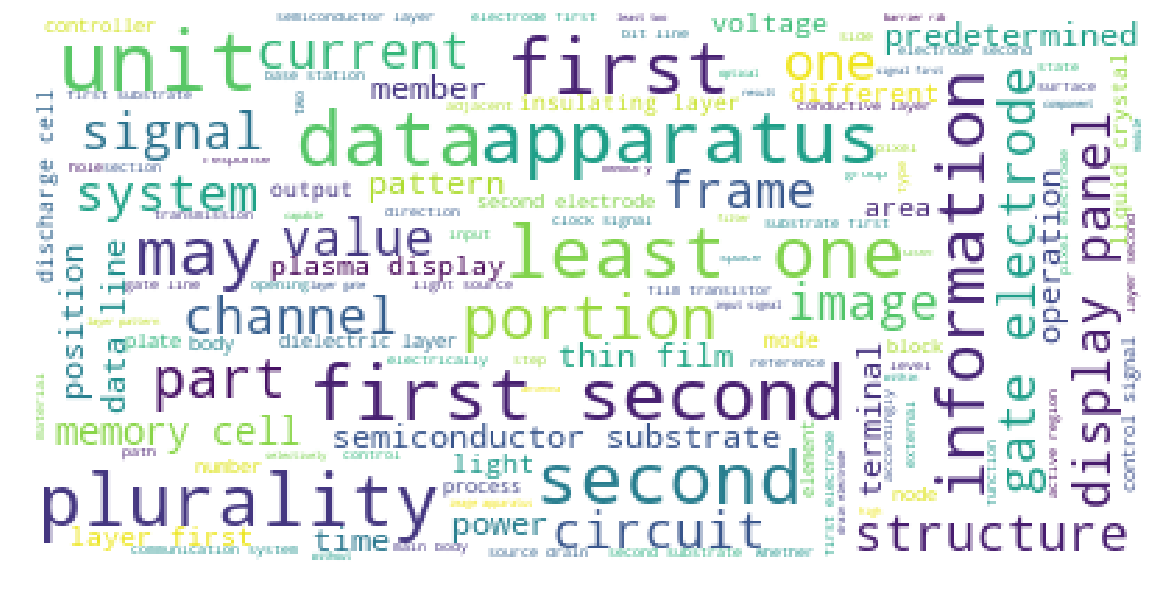

In [9]:
stopwords = set(STOPWORDS)
stopwords.update(["a","accordance","according","all","also","an","and",
                 "another","are","as","at","be","because","been","being","by",
                 "claim","comprises","corresponding","could","described","desired",
                 "do","does","each","embodiment","fig","figs","for","from","further","generally",
                 "had","has","have","having","herein","however","if","in","into","invention","is","it",
                 "its","means","not","now","of","on","onto","or","other","particularly","preferably",
                 "preferred","present","provide","provided","provides","relatively","respectively","said",
                 "should","since","some","such","suitable","than","that","the","their","then","there","thereby",
                 "therefore","thereof","thereto","these","they","this","those","thus","to","use","various","was","includes","including",
                 "were","what","when","where","whereby","wherein","which","while","who","will","with","would","method","Methods","device"])

wordcloud = WordCloud(background_color="white",mode="RGBA",
                          stopwords=stopwords,
                          max_words=250,
                          max_font_size=30, 
                          random_state=42).\
    generate(get_all_processed_texts(s2005["patent_abstract"].astype(str), wordnet_lemmatizer, translate_table, stopwords))
plt.figure(figsize=(20, 15))
plt.axis("off")
plt.imshow(wordcloud)

In [16]:
def use_ngrams_only(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stopwords))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    indexed_texts = []
    for doc in processed_texts:
        current_doc = []
        for k, v in trigrams.items():
            c = doc.count(k)
            if c > 0:
                current_doc += [v] * c
                doc = doc.replace(k, v)
        for k, v in bigrams.items():
            current_doc += [v] * doc.count(" " + k + " ")
        indexed_texts.append(" ".join(current_doc))
        
    return set(" ".join(indexed_texts))

In [17]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").\
    generate(use_ngrams_only(s2006["patent_abstract"].astype(str), wordnet_lemmatizer, translate_table, stopwords))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

In [49]:
def convert(s): 
  
    # initialization of string to "" 
    str1 = "" 
  
    # using join function join the list s by  
    # separating words by str1 
    return(str1.join(s)) 
      

In [24]:
x=use_ngrams_only(s2005["patent_abstract"].astype(str), wordnet_lemmatizer, translate_table, stopwords)
            

In [25]:
x

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       